based on 
http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Predict the stock price of the company Apple Inc. .

In [1]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cro
ss_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

Using TensorFlow backend.
/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 1000
batch_size = 32

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

In [5]:
# read all prices using panda
zeel =  pd.read_csv('ZEEL.csv', header=0)

In [6]:
# filter out only data of Zeel
zeel=zeel.fillna(zeel.mean())

In [7]:
# save Zeel's stock values as type of floating point number (closing prices)
zeel_stock_prices = zeel.close.values.astype('float32')

In [10]:
zeel_stock_prices

array([[ 38.8785],
       [ 39.2145],
       [ 39.5657],
       ...,
       [576.6   ],
       [570.9   ],
       [569.6   ]], dtype=float32)

In [9]:
# reshape to column vector
zeel_stock_prices = zeel_stock_prices.reshape(len(zeel_stock_prices), 1)

In [11]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
zeel_stock_prices = scaler.fit_transform(zeel_stock_prices)

In [12]:
len(zeel_stock_prices)

3902

In [21]:
zeel_stock_prices[0:7]

array([[0.03339906],
       [0.03396436],
       [0.03455523],
       [0.03450375],
       [0.03419553],
       [0.0329623 ],
       [0.03188318]], dtype=float32)

In [13]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1
#0 is axis it it becomes horizontal array , taking past 7 days data and predicting 8th day data

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]         
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [25]:
len(Y)
#X[0]

3894

In [14]:
# convert Zeel's stock price data into time series dataset
X, Y = create_dataset(zeel_stock_prices, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print('Split data into training set and test set... Number of training samples/ test samples:', len(X_train), len(X_test))

Split data into training set and test set... Number of training samples/ test samples: 3504 390


In [22]:
trainX=X_train
testX=X_test
trainY=y_train
testY=y_test
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [23]:
trainY.shape

(3504,)

In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1000
3504/3504 [==============================] - 5s 1ms/step - loss: 0.0416
Epoch 2/1000
3504/3504 [==============================] - 1s 324us/step - loss: 0.0072
Epoch 3/1000
3504/3504 [==============================] - 1s 324us/step - loss: 0.0018
Epoch 4/1000
3504/3504 [==============================] - 1s 321us/step - loss: 0.0013
Epoch 5/1000
3504/3504 [==============================] - 1s 321us/step - loss: 0.0010
Epoch 6/1000
3504/3504 [==============================] - 1s 342us/step - loss: 9.0578e-04
Epoch 7/1000
3504/3504 [==============================] - 1s 425us/step - loss: 8.2938e-04
Epoch 8/1000
3504/3504 [==============================] - 1s 314us/step - loss: 7.9004e-04
Epoch 9/1000
3504/3504 [==============================] - 1s 301us/step - loss: 7.6663e-04
Epoch 10/1000
3504/3504 [==============================] - 1s 315us/step - loss: 7.5151e-04
Epoch 11/1000
3504/3504 [==============================] - 1s 370us/step - loss: 7.3981e-04
Epoch 12/1000
3504/

3504/3504 [==============================] - 1s 318us/step - loss: 6.0127e-04
Epoch 91/1000
3504/3504 [==============================] - 1s 319us/step - loss: 6.0562e-04
Epoch 92/1000
3504/3504 [==============================] - 1s 336us/step - loss: 6.0424e-04
Epoch 93/1000
3504/3504 [==============================] - 1s 396us/step - loss: 6.0071e-04
Epoch 94/1000
3504/3504 [==============================] - 1s 344us/step - loss: 5.9924e-04
Epoch 95/1000
3504/3504 [==============================] - 1s 338us/step - loss: 6.0304e-04
Epoch 96/1000
3504/3504 [==============================] - 1s 327us/step - loss: 6.0512e-04
Epoch 97/1000
3504/3504 [==============================] - 1s 364us/step - loss: 6.0333e-04
Epoch 98/1000
3504/3504 [==============================] - 1s 349us/step - loss: 6.0230e-04
Epoch 99/1000
3504/3504 [==============================] - 1s 312us/step - loss: 6.0013e-04
Epoch 100/1000
3504/3504 [==============================] - 1s 307us/step - loss: 5.9867e-04
E

3504/3504 [==============================] - 1s 316us/step - loss: 5.8924e-04
Epoch 179/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.8744e-04
Epoch 180/1000
3504/3504 [==============================] - 1s 303us/step - loss: 5.8891e-04
Epoch 181/1000
3504/3504 [==============================] - 1s 303us/step - loss: 5.8601e-04
Epoch 182/1000
3504/3504 [==============================] - 1s 312us/step - loss: 5.9542e-04
Epoch 183/1000
3504/3504 [==============================] - 1s 302us/step - loss: 5.8737e-04
Epoch 184/1000
3504/3504 [==============================] - 1s 323us/step - loss: 5.8430e-04
Epoch 185/1000
3504/3504 [==============================] - 1s 385us/step - loss: 5.8753e-04
Epoch 186/1000
3504/3504 [==============================] - 1s 349us/step - loss: 5.8460e-04
Epoch 187/1000
3504/3504 [==============================] - 1s 379us/step - loss: 5.8853e-04
Epoch 188/1000
3504/3504 [==============================] - 1s 322us/step - loss: 5.8

3504/3504 [==============================] - 1s 296us/step - loss: 5.6265e-04
Epoch 267/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.6317e-04
Epoch 268/1000
3504/3504 [==============================] - 1s 294us/step - loss: 5.6448e-04
Epoch 269/1000
3504/3504 [==============================] - 1s 295us/step - loss: 5.6435e-04
Epoch 270/1000
3504/3504 [==============================] - 1s 296us/step - loss: 5.6242e-04
Epoch 271/1000
3504/3504 [==============================] - 1s 295us/step - loss: 5.6169e-04
Epoch 272/1000
3504/3504 [==============================] - 1s 296us/step - loss: 5.6092e-04
Epoch 273/1000
3504/3504 [==============================] - 1s 297us/step - loss: 5.6525e-04
Epoch 274/1000
3504/3504 [==============================] - 1s 297us/step - loss: 5.6506e-04
Epoch 275/1000
3504/3504 [==============================] - 1s 294us/step - loss: 5.5924e-04
Epoch 276/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.6

3504/3504 [==============================] - 1s 372us/step - loss: 5.5265e-04
Epoch 355/1000
3504/3504 [==============================] - 1s 419us/step - loss: 5.5212e-04
Epoch 356/1000
3504/3504 [==============================] - 1s 382us/step - loss: 5.5262e-04
Epoch 357/1000
3504/3504 [==============================] - 1s 386us/step - loss: 5.5080e-04
Epoch 358/1000
3504/3504 [==============================] - 1s 356us/step - loss: 5.5136e-04
Epoch 359/1000
3504/3504 [==============================] - 1s 392us/step - loss: 5.4955e-04
Epoch 360/1000
3504/3504 [==============================] - 1s 355us/step - loss: 5.5155e-04
Epoch 361/1000
3504/3504 [==============================] - 1s 336us/step - loss: 5.5545e-04
Epoch 362/1000
3504/3504 [==============================] - 1s 325us/step - loss: 5.5275e-04
Epoch 363/1000
3504/3504 [==============================] - 1s 338us/step - loss: 5.5331e-04
Epoch 364/1000
3504/3504 [==============================] - 1s 347us/step - loss: 5.4

3504/3504 [==============================] - 1s 304us/step - loss: 5.4197e-04
Epoch 443/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.4414e-04
Epoch 444/1000
3504/3504 [==============================] - 1s 304us/step - loss: 5.4607e-04
Epoch 445/1000
3504/3504 [==============================] - 1s 296us/step - loss: 5.4425e-04
Epoch 446/1000
3504/3504 [==============================] - 1s 300us/step - loss: 5.4740e-04
Epoch 447/1000
3504/3504 [==============================] - 1s 346us/step - loss: 5.4828e-04
Epoch 448/1000
3504/3504 [==============================] - 1s 373us/step - loss: 5.4778e-04
Epoch 449/1000
3504/3504 [==============================] - 1s 410us/step - loss: 5.4885e-04
Epoch 450/1000
3504/3504 [==============================] - 1s 318us/step - loss: 5.5049e-04
Epoch 451/1000
3504/3504 [==============================] - 1s 333us/step - loss: 5.4672e-04
Epoch 452/1000
3504/3504 [==============================] - 1s 305us/step - loss: 5.4

3504/3504 [==============================] - 1s 356us/step - loss: 5.3782e-04
Epoch 531/1000
3504/3504 [==============================] - 1s 328us/step - loss: 5.4107e-04
Epoch 532/1000
3504/3504 [==============================] - 1s 325us/step - loss: 5.4351e-04
Epoch 533/1000
3504/3504 [==============================] - 1s 324us/step - loss: 5.3804e-04
Epoch 534/1000
3504/3504 [==============================] - 1s 322us/step - loss: 5.4515e-04
Epoch 535/1000
3504/3504 [==============================] - 1s 335us/step - loss: 5.4900e-04
Epoch 536/1000
3504/3504 [==============================] - 1s 323us/step - loss: 5.4159e-04
Epoch 537/1000
3504/3504 [==============================] - 1s 328us/step - loss: 5.4573e-04
Epoch 538/1000
3504/3504 [==============================] - 1s 325us/step - loss: 5.4159e-04
Epoch 539/1000
3504/3504 [==============================] - 1s 332us/step - loss: 5.3982e-04
Epoch 540/1000
3504/3504 [==============================] - 1s 342us/step - loss: 5.4

3504/3504 [==============================] - 1s 344us/step - loss: 5.3729e-04
Epoch 619/1000
3504/3504 [==============================] - 1s 326us/step - loss: 5.4359e-04
Epoch 620/1000
3504/3504 [==============================] - 1s 332us/step - loss: 5.3738e-04
Epoch 621/1000
3504/3504 [==============================] - 1s 359us/step - loss: 5.3901e-04
Epoch 622/1000
3504/3504 [==============================] - 1s 419us/step - loss: 5.3841e-04
Epoch 623/1000
3504/3504 [==============================] - 1s 333us/step - loss: 5.3475e-04
Epoch 624/1000
3504/3504 [==============================] - 1s 342us/step - loss: 5.3516e-04
Epoch 625/1000
3504/3504 [==============================] - 1s 348us/step - loss: 5.3702e-04
Epoch 626/1000
3504/3504 [==============================] - 1s 324us/step - loss: 5.3614e-04
Epoch 627/1000
3504/3504 [==============================] - 1s 312us/step - loss: 5.4511e-04
Epoch 628/1000
3504/3504 [==============================] - 1s 363us/step - loss: 5.4

3504/3504 [==============================] - 1s 298us/step - loss: 5.3019e-04
Epoch 707/1000
3504/3504 [==============================] - 1s 298us/step - loss: 5.2978e-04
Epoch 708/1000
3504/3504 [==============================] - 1s 296us/step - loss: 5.3041e-04
Epoch 709/1000
3504/3504 [==============================] - 1s 306us/step - loss: 5.3787e-04
Epoch 710/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.3321e-04
Epoch 711/1000
3504/3504 [==============================] - 1s 310us/step - loss: 5.2890e-04
Epoch 712/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.2931e-04
Epoch 713/1000
3504/3504 [==============================] - 1s 299us/step - loss: 5.2461e-04
Epoch 714/1000
3504/3504 [==============================] - 1s 297us/step - loss: 5.2779e-04
Epoch 715/1000
3504/3504 [==============================] - 1s 301us/step - loss: 5.2527e-04
Epoch 716/1000
3504/3504 [==============================] - 1s 300us/step - loss: 5.2

3504/3504 [==============================] - 1s 317us/step - loss: 5.2134e-04
Epoch 795/1000
3504/3504 [==============================] - 1s 418us/step - loss: 5.2703e-04
Epoch 796/1000
3504/3504 [==============================] - 1s 353us/step - loss: 5.2460e-04
Epoch 797/1000
3504/3504 [==============================] - 1s 372us/step - loss: 5.2748e-04
Epoch 798/1000
3504/3504 [==============================] - 1s 302us/step - loss: 5.3085e-04
Epoch 799/1000
3504/3504 [==============================] - 1s 313us/step - loss: 5.1865e-04
Epoch 800/1000
3504/3504 [==============================] - 1s 317us/step - loss: 5.2156e-04
Epoch 801/1000
3504/3504 [==============================] - 1s 323us/step - loss: 5.2023e-04
Epoch 802/1000
3504/3504 [==============================] - 1s 320us/step - loss: 5.2207e-04
Epoch 803/1000
3504/3504 [==============================] - 1s 315us/step - loss: 5.2585e-04
Epoch 804/1000
3504/3504 [==============================] - 1s 315us/step - loss: 5.2

3504/3504 [==============================] - 1s 304us/step - loss: 5.1974e-04
Epoch 883/1000
3504/3504 [==============================] - 1s 301us/step - loss: 5.2578e-04
Epoch 884/1000
3504/3504 [==============================] - 1s 306us/step - loss: 5.2921e-04
Epoch 885/1000
3504/3504 [==============================] - 1s 303us/step - loss: 5.1999e-04
Epoch 886/1000
3504/3504 [==============================] - 1s 307us/step - loss: 5.1556e-04
Epoch 887/1000
3504/3504 [==============================] - 1s 307us/step - loss: 5.2480e-04
Epoch 888/1000
3504/3504 [==============================] - 1s 308us/step - loss: 5.2069e-04
Epoch 889/1000
3504/3504 [==============================] - 1s 367us/step - loss: 5.2275e-04
Epoch 890/1000
3504/3504 [==============================] - 1s 399us/step - loss: 5.2049e-04
Epoch 891/1000
3504/3504 [==============================] - 2s 435us/step - loss: 5.2428e-04
Epoch 892/1000
3504/3504 [==============================] - 1s 402us/step - loss: 5.1

3504/3504 [==============================] - 1s 350us/step - loss: 5.2196e-04
Epoch 971/1000
3504/3504 [==============================] - 1s 355us/step - loss: 5.1697e-04
Epoch 972/1000
3504/3504 [==============================] - 1s 385us/step - loss: 5.1791e-04
Epoch 973/1000
3504/3504 [==============================] - 2s 430us/step - loss: 5.1786e-04
Epoch 974/1000
3504/3504 [==============================] - 1s 338us/step - loss: 5.1542e-04
Epoch 975/1000
3504/3504 [==============================] - 1s 340us/step - loss: 5.2089e-04
Epoch 976/1000
3504/3504 [==============================] - 1s 395us/step - loss: 5.1690e-04
Epoch 977/1000
3504/3504 [==============================] - 1s 368us/step - loss: 5.2332e-04
Epoch 978/1000
3504/3504 [==============================] - 1s 309us/step - loss: 5.1976e-04
Epoch 979/1000
3504/3504 [==============================] - 1s 302us/step - loss: 5.1607e-04
Epoch 980/1000
3504/3504 [==============================] - 1s 300us/step - loss: 5.1

In [70]:
from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [27]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [28]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [29]:
print([trainPredict.shape,testPredict.shape,zeel_stock_prices.shape])

[(3504, 1), (390, 1), (3902, 1)]


In [38]:
trainPredict[:,0]

array([519.95734 ,  46.97867 , 244.8743  , ...,  54.349937, 471.64832 ,
       363.7532  ], dtype=float32)

In [34]:
trainY[0]

array([523.65002412,  38.0233014 , 240.299987  , ...,  43.96359863,
       474.54999355, 360.85002221])

In [39]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 13.54 RMSE
Test Score: 22.42 RMSE


In [42]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(zeel_stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(zeel_stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(zeel_stock_prices)-1, :] = testPredict[0:382]

In [43]:
trainPredict[6]

array([144.60295], dtype=float32)

In [44]:
#scaler.inverse_transform(zeel_stock_prices)[0]
testPredict[0]

array([119.86613], dtype=float32)

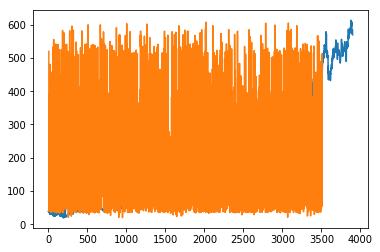

In [47]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(zeel_stock_prices))
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()